In [102]:
%matplotlib inline
from data.dataLoader import *
import torch.utils.data as data
import numpy as np
from models.model_resnet import ResnetDispModel
from Validator import Validator
from trainer import Trainer
import cv2
from matplotlib import pyplot as plt
from loss import *
import sklearn.metrics as sk

In [103]:
val_dataset = TwoViewDataset("data/dataset/", is_train=False, transforms=JointToTensor())
trn_dataset = TwoViewDataset("data/dataset/", is_train=True, transforms=JointToTensor())

In [104]:
val_loader = data.DataLoader(val_dataset, batch_size=1, num_workers=1, shuffle=False)
trn_loader = data.DataLoader(trn_dataset, batch_size=8, num_workers=1, shuffle=False)

In [105]:
val_dataset[0]

(tensor([[[0.0392, 0.0392, 0.0549,  ..., 0.1608, 0.1843, 0.1333],
          [0.0275, 0.0275, 0.0510,  ..., 0.1843, 0.1843, 0.1490],
          [0.0353, 0.0314, 0.0471,  ..., 0.2510, 0.1882, 0.1176],
          ...,
          [0.0471, 0.0510, 0.0549,  ..., 1.0000, 1.0000, 1.0000],
          [0.0510, 0.0510, 0.0549,  ..., 1.0000, 1.0000, 1.0000],
          [0.0510, 0.0549, 0.0588,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0431, 0.0431, 0.0549,  ..., 0.1843, 0.1216, 0.1373],
          [0.0314, 0.0275, 0.0510,  ..., 0.1098, 0.1020, 0.1725],
          [0.0392, 0.0314, 0.0471,  ..., 0.1294, 0.1059, 0.1608],
          ...,
          [0.0392, 0.0431, 0.0471,  ..., 1.0000, 1.0000, 1.0000],
          [0.0431, 0.0431, 0.0471,  ..., 1.0000, 1.0000, 1.0000],
          [0.0431, 0.0471, 0.0510,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.0235, 0.0235, 0.0471,  ..., 0.0353, 0.0000, 0.0000],
          [0.0118, 0.0196, 0.0431,  ..., 0.1333, 0.1294, 0.1569],
          [0.0196, 0.0235, 0.0392,  ...,

In [106]:
network = ResnetDispModel(3)
network.load_state_dict(torch.load('params.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: 'params.pkl'

In [107]:
val = Validator(val_loader, 1, use_gpu=True)
val.validate(network)

3.5928754720687865

In [108]:
opt = torch.optim.Adam(network.parameters(), lr=1e-4)

In [49]:
# val.validate(network)

In [50]:
trn = Trainer(network, trn_loader, opt, 8, use_gpu=True)

In [51]:
trn.setValidator(val)

In [52]:
print(trn.validator)

In [12]:
trn.run_train(50)

/home/tempo/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


Epoch: 0 Loss: 0.33073729637038446
update model file with prev_score 3.688550231933594 and current score 2.6952969541549683
Epoch: 1 Loss: 0.24815938799925472
update model file with prev_score 2.6952969541549683 and current score 2.56902276968956
Epoch: 2 Loss: 0.20622806763276458
update model file with prev_score 2.56902276968956 and current score 2.478315322160721
Epoch: 3 Loss: 0.16498663887867462
update model file with prev_score 2.478315322160721 and current score 2.364374791622162
Epoch: 4 Loss: 0.14960617391878497
update model file with prev_score 2.364374791622162 and current score 2.3362344527244567
Epoch: 5 Loss: 0.14302113464952487
update model file with prev_score 2.3362344527244567 and current score 2.3330877883434296
Epoch: 6 Loss: 0.13867050577360002
update model file with prev_score 2.3330877883434296 and current score 2.3249930481910708
Epoch: 7 Loss: 0.13521861846801703
update model file with prev_score 2.3249930481910708 and current score 2.3171804518699646
Epoch: 8 

In [73]:
trained_net = network

In [74]:
for left, right in val_loader:
    
    sample = left
    break
from matplotlib import pyplot as plt
sample_np = np.array(sample)
sample_np.shape
# sample.size()

(1, 3, 256, 512)

In [75]:
sample_np =np.transpose( np.squeeze(sample_np), axes=(1,2,0))
print(sample_np.shape)

(256, 512, 3)


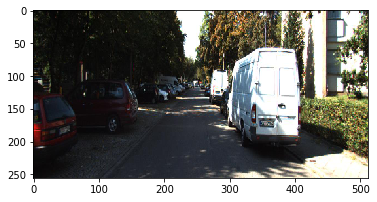

In [76]:
plt.imshow(sample_np)

In [77]:
disp1, disp2, disp3, disp4 = network(sample)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same

In [78]:
disp1.size()

torch.Size([1, 2, 256, 512])

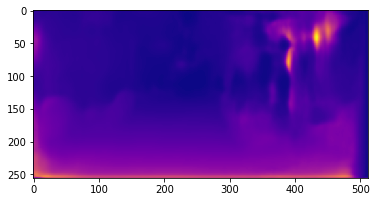

In [81]:
disp1_np = np.array(disp1.cpu().detach().numpy())
disp1_np =np.squeeze(disp1_np)[1]
plt.imshow(disp1_np, cmap="plasma")

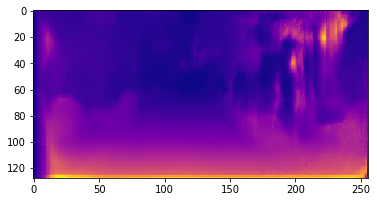

In [80]:
disp2_np = np.array(disp2.cpu().detach().numpy())
disp2_np =np.squeeze(disp2_np)[0]
plt.imshow(disp2_np, cmap="plasma")

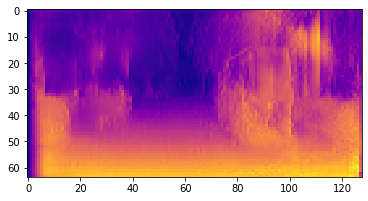

In [21]:
disp3_np = np.array(disp3.cpu().detach().numpy())
disp3_np =np.squeeze(disp3_np)[0]
plt.imshow(disp3_np, cmap="plasma")

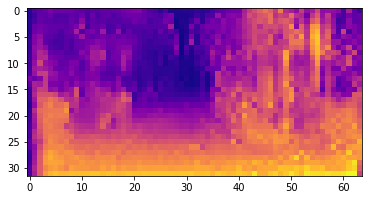

In [22]:
disp4_np = np.array(disp4.cpu().detach().numpy())
disp4_np =np.squeeze(disp4_np)[0]
plt.imshow(disp4_np, cmap="plasma")

In [27]:
width_to_focal = dict()
width_to_focal[1242] = 721.5377
width_to_focal[1241] = 718.856
width_to_focal[1224] = 707.0493
width_to_focal[1238] = 718.3351
def load_gt_disp_kitti(path):
    gt_disparities = []
    for i in range(1):
        disp = cv2.imread(path + "/training/disp_noc_0/" + str(i).zfill(6) + "_10.png", -2)
        disp = disp.astype(np.float32) / 256
        print(disp.shape)
        gt_disparities.append(disp)
    return gt_disparities
def convert_disps_to_depths_kitti(gt_disparities, pred_disparities):
    gt_depths = []
    pred_depths = []
    pred_disparities_resized = []
    
    for i in range(len(gt_disparities)):
        gt_disp = gt_disparities[i]
        height, width = gt_disp.shape

        pred_disp = pred_disparities[i]
        pred_disp = width * cv2.resize(pred_disp, (width, height), interpolation=cv2.INTER_LINEAR)

        pred_disparities_resized.append(pred_disp) 

        mask = gt_disp > 0

        gt_depth = width_to_focal[width] * 0.54 / (gt_disp + (1.0 - mask))
        pred_depth = width_to_focal[width] * 0.54 / pred_disp

        gt_depths.append(gt_depth)
        pred_depths.append(pred_depth)
    return gt_depths, pred_depths, pred_disparities_resized
gt_disparities = load_gt_disp_kitti('/home/tempo/Desktop/Fall 2019/CS 684/CS684-Project/data/dataset/data_scene_flow')

gt_depths = convert_disps_to_depths_kitti(gt_disparities, )

(375, 1242)


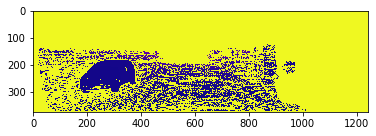

In [28]:
plt.imshow(gt_depths[0], cmap="plasma")

In [93]:
monodepthLoss = MonodepthLoss()
im_left = monodepthLoss.generate_image_right(sample, disp1)

sk.mean_squared_error(sample_np, im_left)

/home/tempo/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


ValueError: Found input variables with inconsistent numbers of samples: [256, 1]

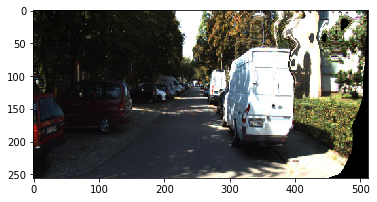

In [88]:
plt.imshow(np.transpose(np.squeeze(im_left.detach().numpy()), axes=(1,2,0)))

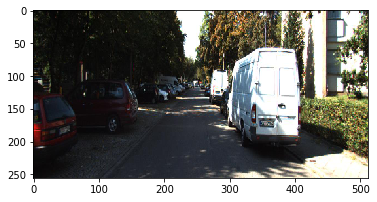

In [89]:
plt.imshow(sample_np)

In [100]:
pred = np.transpose(np.squeeze(im_left.detach().numpy()), axes=(1,2,0))
original = sample_np
rmse = np.sqrt(np.sum((pred[pred> 0.0] - original[pred>0.0])**2)/np.sum(pred>0.0))

In [101]:
rmse

0.218709978318801

In [96]:
rmse / np.sum(pred>0.0)

0.00035390382307284916

In [97]:
np.sum(pred>0.0)

381915